<a href="https://colab.research.google.com/github/asey20/disaster_tweets_webapp/blob/main/Code_Notebook_Milestone_1_Group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this code walkthrough, I will be going through the process taken to get from problem selection to a data analysis of the selected problem in milestone 1. 
<br>
In the first milestone we decided to select the dataset that we had used in the final project of the previous course since we had not achieved the results we were looking for (around 63% model accuracy) and are hoping to improve our results dramatically. The dataset that we are using is the [Natural Language processing for Disaster Tweets Dataset](https://www.kaggle.com/competitions/nlp-getting-started/data) from kaggle.The goal of this project is to be able to successfully predict whether a tweet is classified as a disaster or not a disaster. <br>
In this code walktrhough I will take you through:


1.   Installation of Required Packages
2.   Understanding the Dataset
3.   Experimental Data Analysis
4.   Pre-processing 
5.   EDA
6.   NLP
7.   Exploring Text Categories
8.   Exploring Word Frequencies 



## 1. Installation of Required Packages

Before we begin, there are some packages that we will need to install to run the code in this code walkthrough. The packages that will be required is pandas, numpy, matplotlib, seaborn, nltk, sklearn and gensim. Please follow the code cells below for installation of these required packages. 

In [52]:
! pip install pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_theme()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The below code cell shows the required code and imports for text pre-processing, model-building, bag of words and word embedding.  

In [53]:
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install -U pip setuptools wheel
!pip install spacy
!python -m spacy download en_core_web_sm

## Understanding the Dataset

The [Natural Language processing for Disaster Tweets Dataset](https://www.kaggle.com/competitions/nlp-getting-started/data) being used can be found on kaggle. It contains a training dataset with labeled 7,613 tweets and a testing dataset with unlabeled 3,263 tweets. The features of the dataset are id, location and text. The code cell below loads the train.csv file and test.csv into the respective dataframes. 

In [55]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [56]:
train_data=train_data.drop(['id', 'location'], axis=1)

In [57]:
print(train_data.shape)
train_data.head()

(7613, 3)


,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


## Experimental Data Analysis

0    4342
1    3271
Name: target, dtype: int64


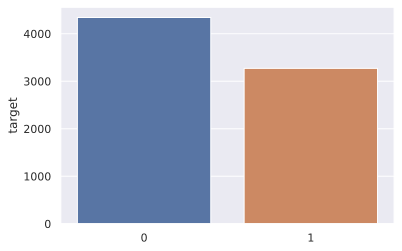

In [58]:
# CLASS DISTRIBUTION
#if dataset is balanced or not
x=train_data['target'].value_counts()
print(x)
sns.barplot(x.index,x)

In [59]:
#Missing values
train_data.isna().sum()

keyword    61
text       0 
target     0 
dtype: int64

In [60]:
#1. WORD-COUNT
train_data['word_count'] = train_data['text'].apply(lambda x: len(str(x).split()))
print(train_data[train_data['target']==1]['word_count'].mean()) #Disaster tweets
print(train_data[train_data['target']==0]['word_count'].mean()) #Non-Disaster tweets
#Disaster tweets are more wordy than the non-disaster tweets

#2. CHARACTER-COUNT
train_data['char_count'] = train_data['text'].apply(lambda x: len(str(x)))
print(train_data[train_data['target']==1]['char_count'].mean()) #Disaster tweets
print(train_data[train_data['target']==0]['char_count'].mean()) #Non-Disaster tweets
#Disaster tweets are longer than the non-disaster tweets

#3. UNIQUE WORD-COUNT
train_data['unique_word_count'] = train_data['text'].apply(lambda x: len(set(str(x).split())))
print(train_data[train_data['target']==1]['unique_word_count'].mean()) #Disaster tweets
print(train_data[train_data['target']==0]['unique_word_count'].mean()) #Non-Disaster tweets

15.167532864567411
14.704744357438969
108.11342097217977
95.70681713496084
14.664934270865178
14.09649930907416


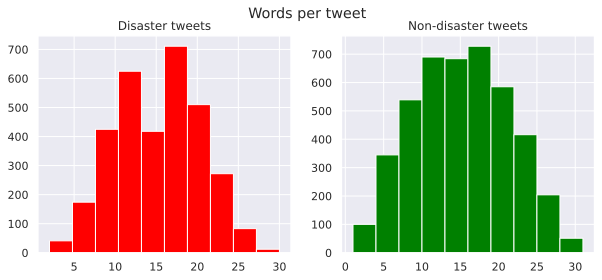

In [61]:
#Plotting word-count per tweet
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=train_data[train_data['target']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Disaster tweets')
train_words=train_data[train_data['target']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-disaster tweets')
fig.suptitle('Words per tweet')
plt.show()

## Pre-processing

In [62]:
train_data.head()

,keyword,text,target,word_count,char_count,unique_word_count
0,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,13,69,13
1,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,7
2,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,22,133,20
3,NaN,"13,000 people receive #wildfires evacuation orders in California",1,8,65,8
4,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,16,88,15


In [63]:
import re
def clean(s):
    s = s.replace(r'#', " ")
    s = re.sub(r'htt.+? ', " ", s)
    s = re.sub(r'\(*https*://[^\)]*\)*', "", s)
    s = s.replace(r'=>', " ")
    s = s.replace(r'hah', " ")
    s = re.sub(r'ha+ah', " ", s)
    s = re.sub(r'!+', " ", s)
    s = re.sub(r'\?+', " ", s)
    s = re.sub(r'\.\.+', " ", s)
    s = s.replace(r':)', " ")
    s = s.replace(r':D', " ")
    s = s.replace(r':(', " ")
    s = s.replace(r';)', " ")
    s = s.replace(r':P', " ")
    s = s.replace(r'looo+l', " ")
    s = re.sub(r'LOO+OL', " ", s)
    s = re.sub(r'SOOO\w+', " ", s)
    s = re.sub(r'Coo+oL', " ", s)
    s = re.sub(r'loo+ol', " ", s)
    s = s.replace(r'lol', " ")
    s = s.replace(r'lool', " ")
    s = re.sub(r'coo+ol', " ", s)
    s = re.sub(r'coo+ol', " ", s)
    s = re.sub('Cooo+L', " ", s)
    s = re.sub('Cooo+ol', " ", s)
    s = s.replace(r'Â', " ")
    s = s.replace(r'Ã', " ")
    s = s.replace(r'%', " ")
    s = s.replace(r'›', " ")
    s = re.sub(r'sooo+', " ", s)
    s = s.replace(r'¥', " ")
    s = s.replace(r'&', " ")
    s = s.replace(r'   ', " ")
    s = s.replace(r'  ', " ")
#    s = s.replace(r'&amp', "") Does not work
    s = s.replace(r'/', " ")
    s = s.replace(r'FYI', " ")
    s = s.replace(r'‰', " ")
    s = re.sub(r'Û', " ", s)
    s = s.replace(r'Ò', " ")
    s = s.replace(r'Ó', " ")
    s = re.sub(r'@.+? ', " ",  s)
    s = re.sub(r'\b @\w+', " ",  s)
    s = s.replace(r'£', " ")
    s = s.replace(r'dd-mm-yyyy', " ")
    s = re.sub(r'\++', " ", s)
    s = re.sub(r':+', " ",s)
    s = s.replace(r';', " ")
    s = s.replace(r'(', " ")
    s = s.replace(r')', " ")
    s = re.sub(r'[0-9*]', " ", s)
    s = s.replace(r' PM ', " ")
    s = s.replace(r' AM ', " ")
    s = s.replace(r' - ', " ")
    s = s.replace(r'å', " ")
    s = s.replace(r'_', " ")
    s = s.replace(r'Ê', " ")
    s = s.replace(r'\|', " ")
    s = s.replace(r'|', " ")
    s = s.replace(r']', " ")    
    s = s.replace(r'[', " ")    
    s = s.replace(r'¢', " ")
    s = s.replace(r'ã', " ")
    s = s.replace(r'\$', " ")
    s = s.replace(r'$', " ")
    s = s.replace(r'Ï', " ")
    s = s.replace(r'ª', " ")
    s = s.replace(r'OMG', " ")
    s = s.replace(r'omg', " ")
    s = s.replace(r'LMAO', " ")
    s = s.replace(r'lmao', " ")
    s = s.replace(r'$', " ")
    s = s.replace(r'  ', " ")
    s = s.replace(r'%20', "")
    s = s.replace(r'[' + string.punctuation + ']'," ") #trying to remove all special characters
    s = s.replace(r'amp', "")
    return str(s)

In [64]:
train_data["selftext_clean"] = ''

In [65]:
for i, row in train_data.iterrows():
    train_data.at[i, "selftext_clean"] = clean(row.text)

In [66]:
train_data

,keyword,text,target,word_count,char_count,unique_word_count,selftext_clean
0,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,13,69,13,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all
1,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,7,Forest fire near La Ronge Sask. Canada
2,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,22,133,20,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3,NaN,"13,000 people receive #wildfires evacuation orders in California",1,8,65,8,", people receive wildfires evacuation orders in California"
4,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,16,88,15,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school
...,...,...,...,...,...,...,...
7608,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,11,83,11,Two giant cranes holding a bridge collapse into nearby homes
7609,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,20,125,17,The out of control wild fires in California even in the Northern part of the state. Very troubling.
7610,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,8,65,8,M . UTC km S of Volcano Hawaii.
7611,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,19,137,19,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.


## NLP

In [67]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [68]:
for i, row in train_data.iterrows():
    if i % 1000 == 0:
        print(i)
    if(row["selftext_clean"] and len(str(row["selftext_clean"])) < 10000):
        doc = nlp(str(row["selftext_clean"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        train_data.at[i, "selftext_lemma"] = " ".join(lemmas)                
        train_data.at[i, "selftext_nouns"] = " ".join(nouns)
        train_data.at[i, "selftext_adjectives"] = " ".join(adjectives)
        train_data.at[i, "selftext_verbs"] = " ".join(verbs)
        train_data.at[i, "selftext_nav"] = " ".join(nouns+adjectives+verbs)
        train_data.at[i, "no_tokens"] = len(lemmas)

0
1000
2000
3000
4000
5000
6000
7000


In [69]:
train_data.head()

,keyword,text,target,word_count,char_count,unique_word_count,selftext_clean,selftext_lemma,selftext_nouns,selftext_adjectives,selftext_verbs,selftext_nav,no_tokens
0,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,13,69,13,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all,our deed be the reason of this earthquake may ALLAH forgive we all,deed reason earthquake ALLAH,,forgive,deed reason earthquake ALLAH forgive,13.00
1,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,7,Forest fire near La Ronge Sask. Canada,forest fire near La Ronge Sask . Canada,forest fire La Ronge Sask Canada,,,forest fire La Ronge Sask Canada,8.00
2,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,22,133,20,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,all resident ask to ' shelter in place ' be be notify by officer . no other evacuation or shelter in place order be expect,resident shelter place officer evacuation shelter place order,other,ask notify expect,resident shelter place officer evacuation shelter place order other ask notify expect,25.00
3,NaN,"13,000 people receive #wildfires evacuation orders in California",1,8,65,8,", people receive wildfires evacuation orders in California",", people receive wildfire evacuation order in California",people evacuation order California,,receive wildfire,people evacuation order California receive wildfire,10.00
4,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,16,88,15,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school,just got send this photo from Ruby Alaska as smoke from wildfire pour into a school,photo Ruby Alaska smoke wildfire pour school,,send,photo Ruby Alaska smoke wildfire pour school send,16.00


In [70]:
train_data["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [71]:
train_data["selftext_nav"][0]

'deed reason earthquake ALLAH forgive'

## EDA

In [72]:
# filter warnings on depreciation etc.
import warnings
warnings.filterwarnings("ignore")

In [73]:
# import pandas, numpy
import pandas as pd
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [74]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

In [75]:
# list column names and datatypes
train_data.dtypes

keyword                object 
text                   object 
target                 int64  
word_count             int64  
char_count             int64  
unique_word_count      int64  
selftext_clean         object 
selftext_lemma         object 
selftext_nouns         object 
selftext_adjectives    object 
selftext_verbs         object 
selftext_nav           object 
no_tokens              float64
dtype: object

In [76]:
# size info, including memory consumption
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   keyword              7552 non-null   object 
 1   text                 7613 non-null   object 
 2   target               7613 non-null   int64  
 3   word_count           7613 non-null   int64  
 4   char_count           7613 non-null   int64  
 5   unique_word_count    7613 non-null   int64  
 6   selftext_clean       7613 non-null   object 
 7   selftext_lemma       7610 non-null   object 
 8   selftext_nouns       7610 non-null   object 
 9   selftext_adjectives  7610 non-null   object 
 10  selftext_verbs       7610 non-null   object 
 11  selftext_nav         7610 non-null   object 
 12  no_tokens            7610 non-null   float64
dtypes: float64(1), int64(4), object(8)
memory usage: 6.4 MB


In [77]:
columns = [col for col in train_data.columns if not col.startswith('self')]
columns

['keyword',
 'text',
 'target',
 'word_count',
 'char_count',
 'unique_word_count',
 'no_tokens']

In [78]:
# describe categorical columns of type np.object 
train_data[['keyword', 'text']] \
  .describe(include=np.object) \
  .transpose()

,count,unique,top,freq
keyword,7552,221,fatalities,45
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,10


In [79]:
train_data['text'].value_counts()[:10]

11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                     6 
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                              6 
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_    6 
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                 5 
that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time               4 
To fight bioterrorism sir.                                                                                            

In [80]:
# describe numerical columns
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,7613.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
word_count,7613.00,14.90,5.73,1.00,11.00,15.00,19.00,31.00
char_count,7613.00,101.04,33.78,7.00,78.00,107.00,133.00,157.00
unique_word_count,7613.00,14.34,5.28,1.00,11.00,14.00,18.00,29.00
no_tokens,7610.00,15.26,6.60,1.00,10.00,15.00,20.00,41.00


In [81]:
# number of unique values = count distinct
train_data['keyword'].nunique()

221

In [82]:
# number of unique values = count distinct
train_data['text'].nunique()

7503

## Exploring Text Categories

In [83]:
# group by location, count distinct keyword and tweets
cat_train = train_data.groupby('keyword') \
           .agg({'keyword': pd.Series.nunique,
                 'text': pd.Series.count}) \
           .rename(columns={'keyword': 'num_keyword',
                            'text': 'num_tweets'}) \
           .sort_values('num_keyword', ascending=False)
            
# show top 5 records
cat_train.head(5)

,num_keyword,num_tweets
keyword,,
ablaze,1,36
oil%20spill,1,38
massacre,1,36
mayhem,1,30
meltdown,1,33


In [84]:
cat_train.describe()

,num_keyword,num_tweets
count,221.00,221.00
mean,1.00,34.17
std,0.00,4.79
min,1.00,9.00
25%,1.00,33.00
50%,1.00,35.00
75%,1.00,37.00
max,1.00,45.00


### Visualizing Frequency Distributions

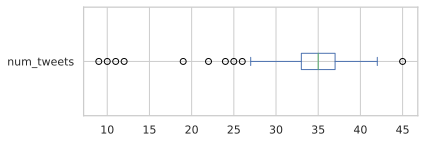

In [85]:
# horizontal boxplot of a dataframe column
cat_train[['num_tweets']].plot(kind='box', vert=False, figsize=(6, 2));

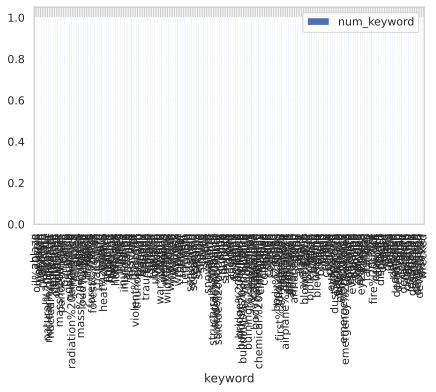

In [86]:
# bar chart of a dataframe column
cat_train[['num_keyword']].plot(kind='bar', figsize=(7,4));

## Exploring Word Frequencies

In [87]:
# create a data frame slice
sub_train = train_data[train_data['keyword']=='disaster']

# sample cleaned text and tokens tagged as nouns
sub_train[['selftext_clean', 'selftext_nouns']].sample(2)

,selftext_clean,selftext_nouns
2784,I can see why one of your favorite books is 'Beautiful Disaster' it may now be one of mine,book disaster
2782,More Natural Disaster Research Urgent via JakartaPost,Disaster Research Urgent JakartaPost


### Creating a List of Tokens from a List of Documents

In [88]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [89]:
# transform list of documents into a single list of tokens
tokens = sub_train.selftext_nouns.map(my_tokenizer).sum()

In [90]:
print(tokens[:200])

['chocolate', 'disaster', 'Disaster', 'Research', 'Urgent', 'JakartaPost', 'disaster', 'book', 'disaster', 'sea', 'disaster', 'Mediterranean', 'massgrave', 'disaster', 'Jon', 'McLaughlin', 'song', 'w', 'o', 'Nana', 'France', 'America', 'war', 'Iraq', 'restlessness', 'disaster', 'partnership', 'AfterHaiyan', 'Haiyan', 'YolandaPh', 'Philippines', 'disasterrecovery', 'disaster', 'disaster', 'attempt', 'disaster', 'CW', 'disaster', 'Vegas', 'disaster', 'money', 'Blue', 'Bell', 'return', 'Listeria', 'Disaster', 'Hot', 'theneed', 'Recipes', 'Jeff', 'Locke', 'train', 'wreck', 'disaster', 'Pirates', 'quality', 'starter', 'J.A', 'Blowltan', 'Metepec', 'Mexico', 'night', 'disaster', 'E', 'Oficial', 'mÌ¼sica', 'mÌ¼sica', 'disaster', 'Police', 'gunman', 'device', 'cinema', 'foxnew', 'tv', 'Vitaly', 'Churkin', 'Exposes', 'Hypocrisy', 'Ukraine', 'FM', 'Klimkin', 'MH', 'disaster', 'Illinois', 'Tornado', 'Radar', 'Emergency', 'official', 'insurer', 'lack', 'Govt', 'action', 'disaster', 'mitigation', '

### Counting Frequencies with a Counter

In [91]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('disaster', 29),
 ('Disaster', 4),
 ('Police', 3),
 ('gunman', 3),
 ('cinema', 3),
 ('Locke', 2),
 ('mÌ¼sica', 2),
 ('device', 2),
 ('day', 2),
 ('ke', 2),
 ('time', 2),
 ('chocolate', 1),
 ('Research', 1),
 ('Urgent', 1),
 ('JakartaPost', 1),
 ('book', 1),
 ('sea', 1),
 ('Mediterranean', 1),
 ('massgrave', 1),
 ('Jon', 1)]

In [92]:
train_data.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [93]:
print([t[0] for t in counter.most_common(200)])   

['disaster', 'Disaster', 'Police', 'gunman', 'cinema', 'Locke', 'mÌ¼sica', 'device', 'day', 'ke', 'time', 'chocolate', 'Research', 'Urgent', 'JakartaPost', 'book', 'sea', 'Mediterranean', 'massgrave', 'Jon', 'McLaughlin', 'song', 'w', 'o', 'Nana', 'France', 'America', 'war', 'Iraq', 'restlessness', 'partnership', 'AfterHaiyan', 'Haiyan', 'YolandaPh', 'Philippines', 'disasterrecovery', 'attempt', 'CW', 'Vegas', 'money', 'Blue', 'Bell', 'return', 'Listeria', 'Hot', 'theneed', 'Recipes', 'Jeff', 'train', 'wreck', 'Pirates', 'quality', 'starter', 'J.A', 'Blowltan', 'Metepec', 'Mexico', 'night', 'E', 'Oficial', 'foxnew', 'tv', 'Vitaly', 'Churkin', 'Exposes', 'Hypocrisy', 'Ukraine', 'FM', 'Klimkin', 'MH', 'Illinois', 'Tornado', 'Radar', 'Emergency', 'official', 'insurer', 'lack', 'Govt', 'action', 'mitigation', 'architect', 'disaster\x89', 'emotion', 'hell', 'people', 'communication', 'Rule', 'iron', 'fist', 'ticket', 'WelfareWorks', 'Green', 'S', 'welfare', 'force', 'appx', 'member', 'victi

In [94]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

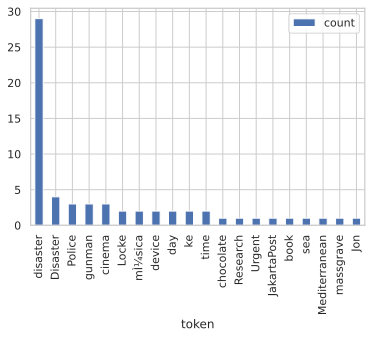

In [95]:
# convert list of tuples into data frame
freq_train = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_train.plot(kind='bar', x='token');

### Using Word Clouds

In [96]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

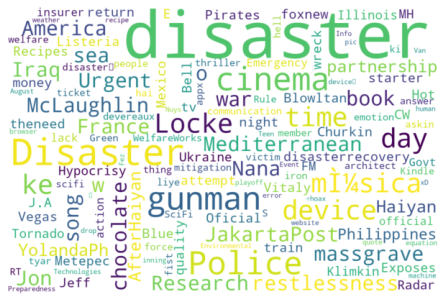

In [97]:
# create wordcloud
wordcloud(counter)

In [98]:
!pip install -U nb_pdf_template
!python -m nb_pdf_template.install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Success


In [99]:
pip install pyppeteer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
!book build Code Notebook - Milestone 1 - Group 3/ --builder pdflatex

/bin/bash: book: command not found
